In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [28]:
a = torch.randn((10, 3, 1))
print(a.shape)
a = a.permute(2, 0, 1)
print(a.shape)
a = a.permute(1, 2, 0)
print(a.shape)

torch.Size([10, 3, 1])
torch.Size([1, 10, 3])
torch.Size([10, 3, 1])


In [3]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [4]:
image = cv2.imread('/Users/eustachelebihan/Development/radium-challenge/data/x-train/200.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

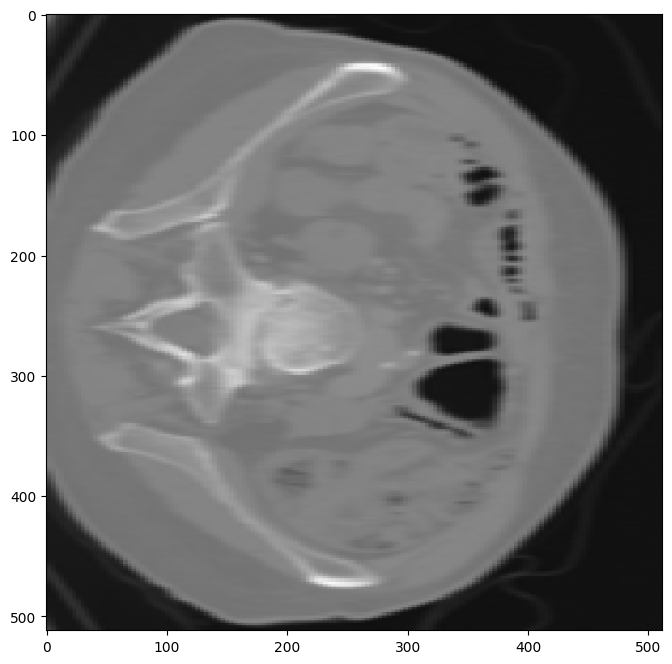

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis('on')
plt.show()

In [6]:
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "/Users/eustachelebihan/Downloads/sam_vit_b_01ec64.pth"
model_type = "vit_b"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)

predictor = SamPredictor(sam)

In [7]:
predictor.set_image(image)

In [20]:
input_point = np.array([[110, 391]])
input_label = np.array([1])

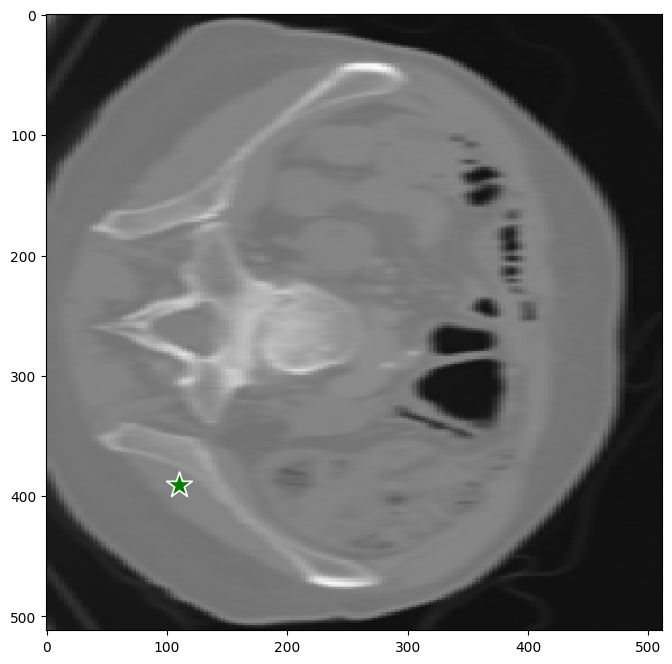

In [21]:
plt.figure(figsize=(8,8))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show() 

In [22]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

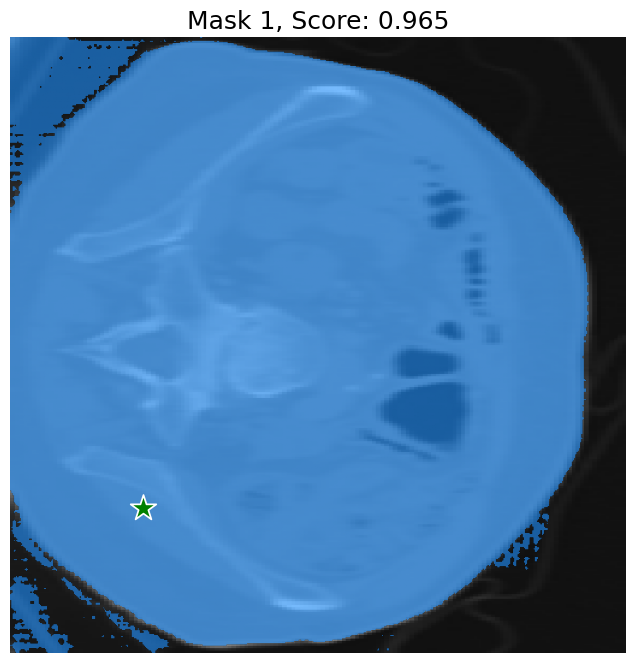

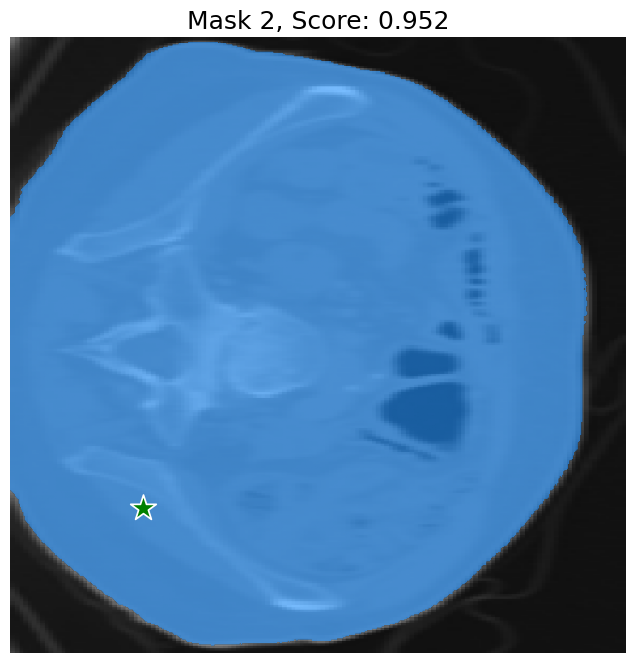

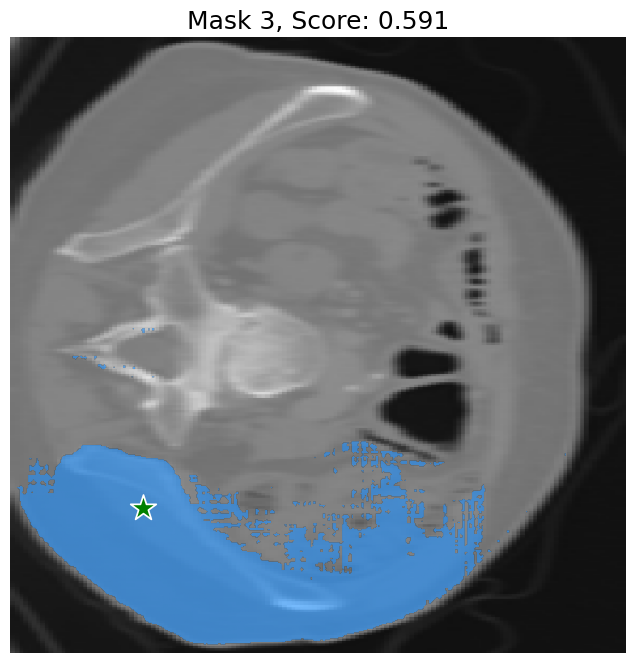

In [23]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(8,8))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  

# ****